Diabetic Retinopathy
Diabetic retinopathy (DR), also known as diabetic eye disease, is a medical condition in which damage occurs to the retina due to diabetes mellitus. It is a leading cause of blindness. Diabetic retinopathy affects up to 80 percent of those who have had diabetes for 20 years or more. Diabetic retinopathy often has no early warning signs. Retinal (fundus) photography with manual interpretation is a widely accepted screening tool for diabetic retinopathy, with performance that can exceed that of in-person dilated eye examinations.

The below figure shows an example of a healthy patient and a patient with diabetic retinopathy as viewed by fundus photography (source):

image.png

An automated tool for grading severity of diabetic retinopathy would be very useful for accerelating detection and treatment. Recently, there have been a number of attempts to utilize deep learning to diagnose DR and automatically grade diabetic retinopathy. This includes a previous competition and work by Google. Even one deep-learning based system is FDA approved.

Clearly, this dataset and deep learning problem is quite important.

Imagine being able to detect blindness before it happened.

Millions of people suffer from diabetic retinopathy, the leading cause of blindness among working aged adults. Aravind Eye Hospital in India hopes to detect and prevent this disease among people living in rural areas where medical screening is difficult to conduct. Successful entries in this competition will improve the hospital’s ability to identify potential patients. Further, the solutions will be spread to other Ophthalmologists through the 4th Asia Pacific Tele-Ophthalmology Society (APTOS) Symposium

Currently, Aravind technicians travel to these rural areas to capture images and then rely on highly trained doctors to review the images and provide diagnosis. Their goal is to scale their efforts through technology; to gain the ability to automatically screen images for disease and provide information on how severe the condition may be.

In this synchronous Kernels-only competition, you'll build a machine learning model to speed up disease detection. You’ll work with thousands of images collected in rural areas to help identify diabetic retinopathy automatically. If successful, you will not only help to prevent lifelong blindness, but these models may be used to detect other sorts of diseases in the future, like glaucoma and macular degeneration.

Description
About the Data
The images consist of gaussian filtered retina scan images to detect diabetic retinopathy. The original dataset is available at APTOS 2019 Blindness Detection. These images are resized into 224x224 pixels so that they can be readily used with many pre-trained deep learning models.

All of the images are already saved into their respective folders according to the severity/stage of diabetic retinopathy using the train.csv file provided. You will find five directories with the respective images:

0 - No_DR
1 - Mild
2 - Moderate
3 - Severe
4 - Proliferate_DR

The dataset contains an export.pkl file which is a ResNet34 model trained on the dataset for 20 epochs using the FastAI library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('train.csv')

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\python\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synon

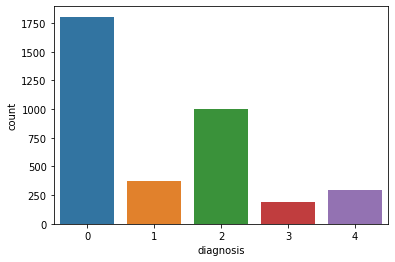

In [4]:
sns.countplot(data['diagnosis']);

we see our data is imbalance.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
data_generator=ImageDataGenerator(rescale=1./255,
                                  rotation_range=15,
                                  width_shift_range=.15,
                                  height_shift_range=.15,
                                 shear_range =0.2,
                                 zoom_range = 0.2,
                                  validation_split=0.2, 
                                 horizontal_flip = True)

In [6]:
training_set = data_generator.flow_from_directory('C:/Users/HP WORLD/gaussian_filtered_images/train_data',
                                                 target_size = (128, 128),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 3542 images belonging to 5 classes.


In [7]:
test_set = data_generator.flow_from_directory('C:/Users/HP WORLD/gaussian_filtered_images/test_data',
                                            target_size = (128,128),
                                            batch_size = 128,
                                            class_mode = 'categorical')

Found 120 images belonging to 5 classes.


To deal with this data ,lets do data augmentation of the training data set

In [8]:
Gug_data=data_generator.fit(training_set,augment=True)

This Augmented data train in CNN with different convulation network with batchnormaliztion and dropout 

In [12]:
model=Sequential()

model.add(Conv2D(16,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

In [13]:
#flattering
model.add(Flatten())

In [14]:
#full connection
model.add(Dense(224,activation='softmax'))
model.add(Dense(5,activation='softmax'))  #output layers


In [15]:
#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 

In [ ]:
CNN_run=model.fit_generator(aug_data,
                  steps_per_epoch = 3542,
                  epochs = 20,
                 validation_data = test_set)
CNN_run

Plotting the training and validation accuracy with respect to the number of epochs

In [ ]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

In [ ]:
display_training_curves(
    CNN_run.CNN_run['loss'], 
    CNN_run['val_loss'], 
    'loss', 211)
display_training_curves(
    CNN_run['acc'], 
    CNN_run['val_acc'], 
    'accuracy', 212)